### Create dataframe of results

In [32]:
from pandas import read_json

# read and clean quantum results
quantum_df = read_json("../experiments/results_quantum.json")
quantum_df = quantum_df.drop("solution_sample", axis=1)
quantum_df = quantum_df.rename(columns={"energy": "qnt_energy"})

quantum_df.head()

,graph_id,params_id,qubo_size,qnt_energy
0,0,0,4,-10
1,0,1,4,-10
2,0,2,16,-35
3,0,3,16,-34
4,0,4,4,-10


In [33]:
# merge classical results
classical_df = read_json("../experiments/results.json")
classical_df = classical_df.drop(
    ["qubo", "solution_qbs_sample", "solution_sa_sample", "solution_rsa_sample",
     'solution_tbs_sample'],
    axis=1
)
classical_df = classical_df.rename(columns={
    "solution_qbs_energy": "qbs_energy",
    "solution_rsa_energy": "rsa_energy",
    "solution_sa_energy": "sa_energy",
    "solution_tbs_energy": "tbs_energy"
})
classical_df.head()

,graph_id,params_id,qbs_energy,rsa_energy,sa_energy,tbs_energy
0,0,0,-10,-10,-10,-10
1,0,1,-10,-10,-10,-10
2,0,2,-35,-35,-35,-35
3,0,3,-34,-34,-34,-34
4,0,4,-10,-10,-10,-10


In [34]:
from pandas import merge

df = merge(quantum_df, classical_df, on=["graph_id", "params_id"])
df["distance_from_avg"] = df["qnt_energy"] - (
        df["rsa_energy"] + df["tbs_energy"] + df["sa_energy"] + df["qbs_energy"]
) / 4

df

,graph_id,params_id,qubo_size,qnt_energy,qbs_energy,rsa_energy,sa_energy,tbs_energy,distance_from_avg
0,0,0,4,-10,-10,-10,-10,-10,0.0
1,0,1,4,-10,-10,-10,-10,-10,0.0
2,0,2,16,-35,-35,-35,-35,-35,0.0
3,0,3,16,-34,-34,-34,-34,-34,0.0
4,0,4,4,-10,-10,-10,-10,-10,0.0
...,...,...,...,...,...,...,...,...,...
1396,43,20,5,-20,-20,-20,-20,-20,0.0
1397,43,21,25,-48,-55,-55,-53,-55,6.5
1398,43,22,5,0,0,0,0,0,0.0
1399,43,23,25,5,0,0,0,0,5.0


### Visualize results

<AxesSubplot:xlabel='qubo_size', ylabel='distance_from_avg'>

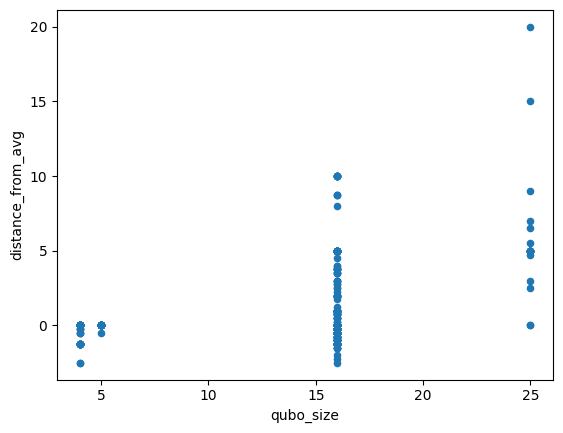

In [35]:
df.plot(
    x="qubo_size",
    y="distance_from_avg",
    kind='scatter'
)

<AxesSubplot:>

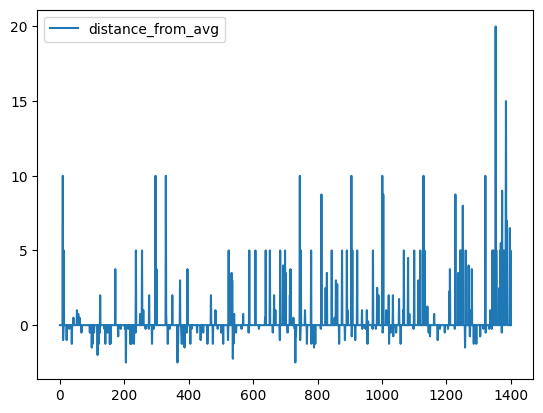

In [39]:
df.plot(
    y="distance_from_avg",
    use_index=True
)

In [37]:
negative = df["distance_from_avg"] < 0
negative_df = df[negative]
negative_df

,graph_id,params_id,qubo_size,qnt_energy,qbs_energy,rsa_energy,sa_energy,tbs_energy,distance_from_avg
10,0,10,16,-24,-24,-22,-22,-24,-1.00
11,0,11,16,-24,-24,-24,-23,-24,-0.25
21,0,21,16,-44,-44,-44,-40,-44,-1.00
29,0,29,16,-49,-49,-49,-48,-49,-0.25
37,1,5,4,-15,-15,-10,-15,-15,-1.25
...,...,...,...,...,...,...,...,...,...
1322,41,10,16,-22,-22,-22,-20,-22,-0.50
1323,41,11,16,-22,-22,-22,-21,-22,-0.25
1333,41,21,16,-40,-40,-40,-39,-40,-0.25
1341,41,29,16,-46,-47,-47,-42,-47,-0.25


<AxesSubplot:xlabel='params_id', ylabel='distance_from_avg'>

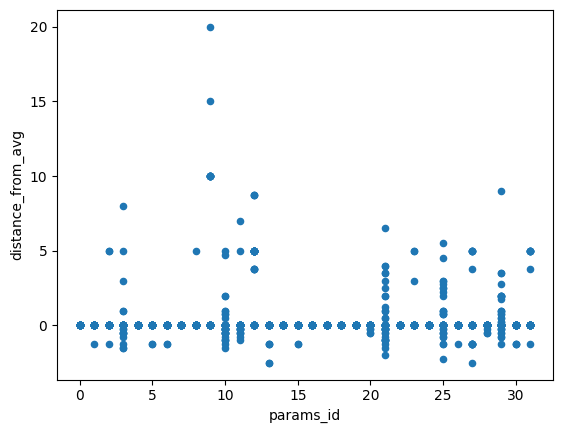

In [38]:
df.plot(
    x="params_id",
    y="distance_from_avg",
    kind="scatter"
)